### Libraries

In [7]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, \
                                classification_report

import warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

***

### Datasets

In [8]:
#DF
df_billing = pd.read_csv(r"data\billing_info.csv")
df_passenger = pd.read_csv(r"data\passenger.csv")
df_travel_data = pd.read_csv(r"data\travel_data.csv")
test = pd.read_csv(r"data\test.csv")

In [9]:
#Dropping unnecessary columns
df_billing.drop(["Unnamed: 0"], axis=1, inplace = True)
df_passenger.drop(["Unnamed: 0"], axis=1, inplace = True)
df_travel_data.drop(["Unnamed: 0"], axis=1, inplace = True)

In [10]:
df_billing.head()

,PassengerId,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,0.0,0.0,0.0,0.0,0.0
1,0002_01,109.0,9.0,25.0,549.0,44.0
2,0003_01,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,303.0,70.0,151.0,565.0,2.0


In [11]:
df_passenger.head()

,PassengerId,Name,Age,HomePlanet
0,0001_01,Maham Ofracculy,39.0,Europa
1,0002_01,Juanna Vines,24.0,Earth
2,0003_01,Altark Susent,58.0,Europa
3,0003_02,Solam Susent,33.0,Europa
4,0004_01,Willy Santantines,16.0,Earth


In [12]:
df_travel_data.head()

,PassengerId,Destination,VIP,Cabin,CryoSleep,Transported
0,0001_01,TRAPPIST-1e,False,B/0/P,False,False
1,0002_01,TRAPPIST-1e,False,F/0/S,False,True
2,0003_01,TRAPPIST-1e,True,A/0/S,False,False
3,0003_02,TRAPPIST-1e,False,A/0/S,False,False
4,0004_01,TRAPPIST-1e,False,F/1/S,False,True


In [13]:
#Merging DFs
df_tmp = df_passenger.merge(df_travel_data, how = "inner", on = "PassengerId")
train = df_tmp.merge(df_billing, how = "inner", on = "PassengerId")
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [14]:
#Train
train.head()

,passengerid,name,age,homeplanet,destination,vip,cabin,cryosleep,transported,roomservice,foodcourt,shoppingmall,spa,vrdeck
0,0001_01,Maham Ofracculy,39.0,Europa,TRAPPIST-1e,False,B/0/P,False,False,0.0,0.0,0.0,0.0,0.0
1,0002_01,Juanna Vines,24.0,Earth,TRAPPIST-1e,False,F/0/S,False,True,109.0,9.0,25.0,549.0,44.0
2,0003_01,Altark Susent,58.0,Europa,TRAPPIST-1e,True,A/0/S,False,False,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,Solam Susent,33.0,Europa,TRAPPIST-1e,False,A/0/S,False,False,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,Willy Santantines,16.0,Earth,TRAPPIST-1e,False,F/1/S,False,True,303.0,70.0,151.0,565.0,2.0


In [15]:
#Test
test.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   8693 non-null   object 
 1   name          8493 non-null   object 
 2   age           8514 non-null   float64
 3   homeplanet    8492 non-null   object 
 4   destination   8511 non-null   object 
 5   vip           8490 non-null   object 
 6   cabin         8494 non-null   object 
 7   cryosleep     8476 non-null   object 
 8   transported   8693 non-null   bool   
 9   roomservice   8512 non-null   float64
 10  foodcourt     8510 non-null   float64
 11  shoppingmall  8485 non-null   float64
 12  spa           8510 non-null   float64
 13  vrdeck        8505 non-null   float64
dtypes: bool(1), float64(6), object(7)
memory usage: 959.3+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passengerid   4277 non-null   object 
 1   homeplanet    4190 non-null   object 
 2   cryosleep     4184 non-null   object 
 3   cabin         4177 non-null   object 
 4   destination   4185 non-null   object 
 5   age           4186 non-null   float64
 6   vip           4184 non-null   object 
 7   roomservice   4195 non-null   float64
 8   foodcourt     4171 non-null   float64
 9   shoppingmall  4179 non-null   float64
 10  spa           4176 non-null   float64
 11  vrdeck        4197 non-null   float64
 12  name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


***

### EDA

<AxesSubplot:xlabel='transported', ylabel='count'>

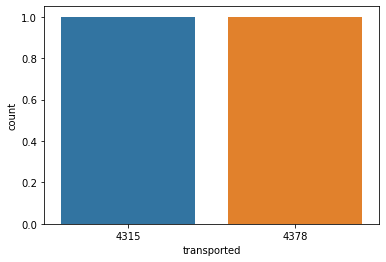

In [18]:
target_eda = train.transported.value_counts()
sns.countplot(target_eda)

***

### Missing Values

In [19]:
#Missing values train
percent_missing_train = train.isnull().sum() * 100 / len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing_train}).sort_values('percent_missing', ascending=False)
missing_value_train

,column_name,percent_missing
cryosleep,cryosleep,2.496261
shoppingmall,shoppingmall,2.392730
vip,vip,2.335212
homeplanet,homeplanet,2.312205
name,name,2.300702
cabin,cabin,2.289198
vrdeck,vrdeck,2.162660
foodcourt,foodcourt,2.105142
spa,spa,2.105142
destination,destination,2.093639


In [20]:
#Missing values test
percent_missing_test = test.isnull().sum() * 100 / len(test)
missing_value_test = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing_test}).sort_values('percent_missing', ascending=False)
missing_value_test

,column_name,percent_missing
foodcourt,foodcourt,2.478373
spa,spa,2.361468
cabin,cabin,2.338087
shoppingmall,shoppingmall,2.291326
name,name,2.197802
cryosleep,cryosleep,2.174421
vip,vip,2.174421
destination,destination,2.151040
age,age,2.127660
homeplanet,homeplanet,2.034136


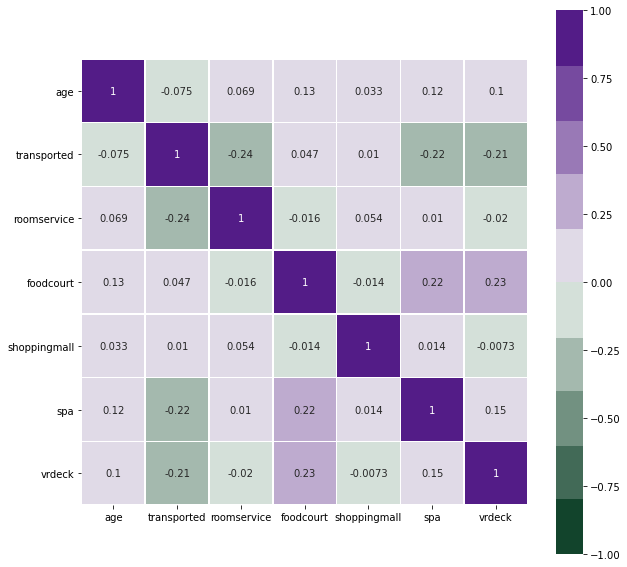

In [21]:
#Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

***

### Feature Engineering

In [22]:
#Dropping unnecessary features
train.drop(["name", "passengerid","cabin"], axis = 1, inplace= True)
test.drop(["name", "passengerid", "cabin"], axis = 1, inplace= True)

In [23]:
#Hot one column
hot_one=[]

for col in train.select_dtypes("object"):
    print(f"{col :-<50} {len(train[col].unique())}")
    if len(train[col].unique())<=5:
        hot_one.append(col)

homeplanet---------------------------------------- 4
destination--------------------------------------- 4
vip----------------------------------------------- 3
cryosleep----------------------------------------- 3


In [24]:
#Fill NA value for ohe variable
for e in hot_one:
    train[e].fillna(train[e].mode()[0], inplace = True)
    test[e].fillna(test[e].mode()[0], inplace = True)

In [25]:
#Fill NA for float variable with median
for col in train.select_dtypes('float'):
    train[col].fillna(train[col].median(), inplace = True)
    test[col].fillna(test[col].median(), inplace = True)

In [26]:
#NA train
train.isna().sum().sort_values(ascending = True)

age             0
homeplanet      0
destination     0
vip             0
cryosleep       0
transported     0
roomservice     0
foodcourt       0
shoppingmall    0
spa             0
vrdeck          0
dtype: int64

In [27]:
#NA test
test.isna().sum().sort_values(ascending = True)

homeplanet      0
cryosleep       0
destination     0
age             0
vip             0
roomservice     0
foodcourt       0
shoppingmall    0
spa             0
vrdeck          0
dtype: int64

In [28]:
#Applying dummies
var_object_train = train.select_dtypes("object")
var_object_test = test.select_dtypes("object")

for col in var_object_train:
    dumm_train = pd.get_dummies(train[col], prefix = col)
    train = pd.concat([train, dumm_train], axis = 1)
    train.drop(col, inplace = True, axis = 1)

for col in var_object_test:
    dumm_test = pd.get_dummies(test[col], prefix = col)
    test = pd.concat([test, dumm_test], axis = 1)
    test.drop(col, inplace = True, axis = 1)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        8693 non-null   float64
 1   vip                        8693 non-null   bool   
 2   cryosleep                  8693 non-null   bool   
 3   transported                8693 non-null   bool   
 4   roomservice                8693 non-null   float64
 5   foodcourt                  8693 non-null   float64
 6   shoppingmall               8693 non-null   float64
 7   spa                        8693 non-null   float64
 8   vrdeck                     8693 non-null   float64
 9   homeplanet_Earth           8693 non-null   uint8  
 10  homeplanet_Europa          8693 non-null   uint8  
 11  homeplanet_Mars            8693 non-null   uint8  
 12  destination_55 Cancri e    8693 non-null   uint8  
 13  destination_PSO J318.5-22  8693 non-null   uint8

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cryosleep                  4277 non-null   bool   
 1   age                        4277 non-null   float64
 2   vip                        4277 non-null   bool   
 3   roomservice                4277 non-null   float64
 4   foodcourt                  4277 non-null   float64
 5   shoppingmall               4277 non-null   float64
 6   spa                        4277 non-null   float64
 7   vrdeck                     4277 non-null   float64
 8   homeplanet_Earth           4277 non-null   uint8  
 9   homeplanet_Europa          4277 non-null   uint8  
 10  homeplanet_Mars            4277 non-null   uint8  
 11  destination_55 Cancri e    4277 non-null   uint8  
 12  destination_PSO J318.5-22  4277 non-null   uint8  
 13  destination_TRAPPIST-1e    4277 non-null   uint8

***

### Machine Learning Models

In [31]:
#Defining features & target
features = train.drop(["transported"], axis = 1)
target = train["transported"]

X_train, X_test,y_train, y_test = train_test_split(features, target,
                                   random_state = 42, 
                                   test_size = 0.2,
                                   shuffle=True)

#### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

#Train performance
knn_train_f1 = f1_score(y_train, y_train_pred) #F1 score
knn_train_accu = accuracy_score(y_train, y_train_pred) #Accuracy
knn_train_prec = precision_score(y_train, y_train_pred) #Precision
knn_train_recall = recall_score(y_train, y_train_pred) #recall score

#Test performance
knn_test_f1 = f1_score(y_test, y_test_pred) #F1 score
knn_test_accu = accuracy_score(y_test, y_test_pred) #Accuracy
knn_test_prec = precision_score(y_test, y_test_pred) #Precision
knn_test_recall = recall_score(y_test, y_test_pred) #recall score

print("Performance for training:")
print(f"F1 score: {round(knn_train_f1, 2)} %")
print(f"Accuracy: {round(knn_train_accu, 2)} %")
print(f"Precision: {round(knn_train_prec, 2)} %")
print(f"Recall: {round(knn_train_recall, 2)} %")
print("--------------------------")
print("Performance for testing:")
print(f"F1 score: {round(knn_test_f1, 2)} %")
print(f"Accuracy: {round(knn_test_accu, 2)} %")
print(f"Precision: {round(knn_test_prec, 2)} %")
print(f"Recall: {round(knn_test_recall, 2)} %")

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Performance for training:
F1 score: 0.82 %
Accuracy: 0.82 %
Precision: 0.82 %
Recall: 0.82 %
--------------------------
Performance for testing:
F1 score: 0.77 %
Accuracy: 0.77 %
Precision: 0.76 %
Recall: 0.79 %
[[639 222]
 [185 693]]
              precision    recall  f1-score   support

       False       0.78      0.74      0.76       861
        True       0.76      0.79      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#Train performance
rf_train_f1 = f1_score(y_train, y_train_pred) #F1 score
rf_train_accu = accuracy_score(y_train, y_train_pred) #Accuracy
rf_train_prec = precision_score(y_train, y_train_pred) #Precision
rf_train_recall = recall_score(y_train, y_train_pred) #recall score

#Test performance
rf_test_f1 = f1_score(y_test, y_test_pred) #F1 score
rf_test_accu = accuracy_score(y_test, y_test_pred) #Accuracy
rf_test_prec = precision_score(y_test, y_test_pred) #Precision
rf_test_recall = recall_score(y_test, y_test_pred) #recall score

print("Performance for training:")
print(f"F1 score: {round(rf_train_f1, 2)} %")
print(f"Accuracy: {round(rf_train_accu, 2)} %")
print(f"Precision: {round(rf_train_prec, 2)} %")
print(f"Recall: {round(rf_train_recall, 2)} %")
print("--------------------------")
print("Performance for testing:")
print(f"F1 score: {round(rf_test_f1, 2)} %")
print(f"Accuracy: {round(rf_test_accu, 2)} %")
print(f"Precision: {round(rf_test_prec, 2)} %")
print(f"Recall: {round(rf_test_recall, 2)} %")

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Performance for training:
F1 score: 0.94 %
Accuracy: 0.93 %
Precision: 0.9 %
Recall: 0.97 %
--------------------------
Performance for testing:
F1 score: 0.79 %
Accuracy: 0.78 %
Precision: 0.77 %
Recall: 0.8 %
[[656 205]
 [176 702]]
              precision    recall  f1-score   support

       False       0.79      0.76      0.77       861
        True       0.77      0.80      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

#Predictions
y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)

#Train performance
lg_train_f1 = f1_score(y_train, y_train_pred) #F1 score
lg_train_accu = accuracy_score(y_train, y_train_pred) #Accuracy
lg_train_prec = precision_score(y_train, y_train_pred) #Precision
lg_train_recall = recall_score(y_train, y_train_pred) #recall score

#Test performance
lg_test_f1 = f1_score(y_test, y_test_pred) #F1 score
lg_test_accu = accuracy_score(y_test, y_test_pred) #Accuracy
lg_test_prec = precision_score(y_test, y_test_pred) #Precision
lg_test_recall = recall_score(y_test, y_test_pred) #recall score

print("Performance for training:")
print(f"F1 score: {round(lg_train_f1, 2)} %")
print(f"Accuracy: {round(lg_train_accu, 2)} %")
print(f"Precision: {round(lg_train_prec, 2)} %")
print(f"Recall: {round(lg_train_recall, 2)} %")
print("--------------------------")
print("Performance for testing:")
print(f"F1 score: {round(lg_test_f1, 2)} %")
print(f"Accuracy: {round(lg_test_accu, 2)} %")
print(f"Precision: {round(lg_test_prec, 2)} %")
print(f"Recall: {round(lg_test_recall, 2)} %")

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Performance for training:
F1 score: 0.79 %
Accuracy: 0.79 %
Precision: 0.78 %
Recall: 0.8 %
--------------------------
Performance for testing:
F1 score: 0.78 %
Accuracy: 0.78 %
Precision: 0.76 %
Recall: 0.81 %
[[641 220]
 [171 707]]
              precision    recall  f1-score   support

       False       0.79      0.74      0.77       861
        True       0.76      0.81      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.78      0.77      1739



#### SVM

In [35]:
#from sklearn.svm import SVC
#svm = SVC(kernel = "linear")
#svm.fit(X_train, y_train)

#Predictions
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

#Train performance
svm_train_f1 = f1_score(y_train, y_train_pred) #F1 score
svm_train_accu = accuracy_score(y_train, y_train_pred) #Accuracy
svm_train_prec = precision_score(y_train, y_train_pred) #Precision
svm_train_recall = recall_score(y_train, y_train_pred) #recall score

#Test performance
svm_test_f1 = f1_score(y_test, y_test_pred) #F1 score
svm_test_accu = accuracy_score(y_test, y_test_pred) #Accuracy
svm_test_prec = precision_score(y_test, y_test_pred) #Precision
svm_test_recall = recall_score(y_test, y_test_pred) #recall score

print("Performance for training:")
print(f"F1 score: {round(svm_train_f1, 2)} %")
print(f"Accuracy: {round(svm_train_accu, 2)} %")
print(f"Precision: {round(svm_train_prec, 2)} %")
print(f"Recall: {round(svm_train_recall, 2)} %")
print("--------------------------")
print("Performance for testing:")
print(f"F1 score: {round(svm_test_f1, 2)} %")
print(f"Accuracy: {round(svm_test_accu, 2)} %")
print(f"Precision: {round(svm_test_prec, 2)} %")
print(f"Recall: {round(svm_test_recall, 2)} %")

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

NameError: name 'svm' is not defined

***

#### Resutls

In [36]:
# Creating the DataFrame
df_dict = pd.DataFrame({"Accuracy":[knn_test_accu, lg_test_accu, rf_test_accu],
                   "F1":[knn_test_f1, lg_test_f1, rf_test_f1],
                   "Precision":[knn_test_prec, lg_test_prec, rf_test_prec],
                   "Recall" :[knn_test_recall, lg_test_recall, rf_test_recall]})
  
# Create the index
index_ = ["knn", "lg", "rf"]
  
# Set the index
df_dict.index = index_
  

In [37]:
df_dict

,Accuracy,F1,Precision,Recall
knn,0.765957,0.773006,0.757377,0.789294
lg,0.775158,0.783380,0.762675,0.805239
rf,0.780909,0.786555,0.773980,0.799544


In [40]:
preds = lg.predict(X_test)
data = {'Transported':preds}
results = pd.DataFrame(data)
results.to_csv(r"C:\Users\fabri\OneDrive\Escritorio\space_ship_titanic\data\resultados.csv")


In [42]:
x = pd.read_csv(r"C:\Users\fabri\OneDrive\Escritorio\space_ship_titanic\data\resultados.csv")

In [45]:
x["Transported"][0]

False